<a href="https://colab.research.google.com/github/AbhyaAhuja/The-Sparks-Foundation_Data-Science-internship/blob/main/GRIPJuly22_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

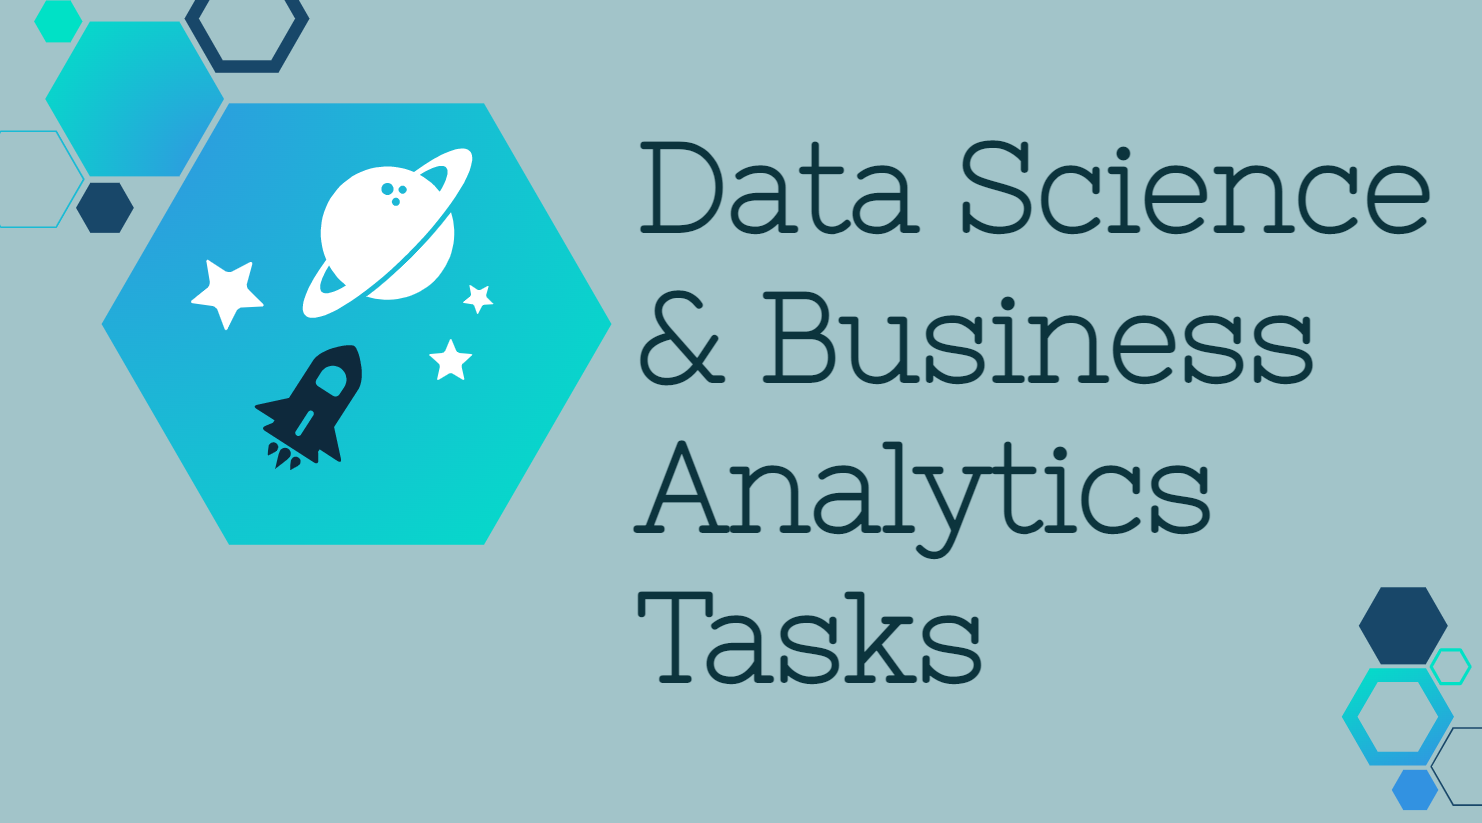

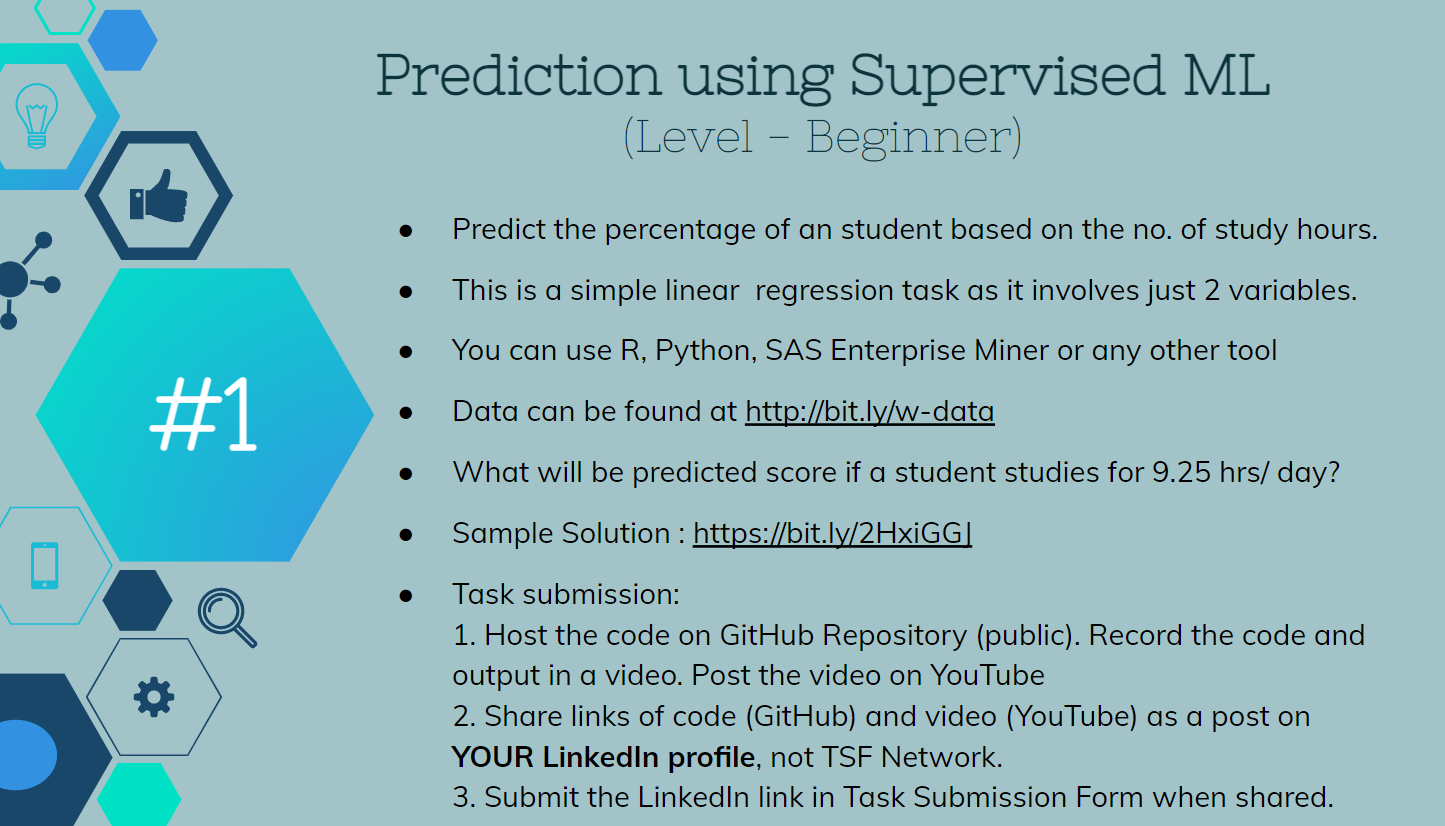

****
# **TASK #1-  Prediction using supervised ML**
##**GRIP @The Sparks Foundation**
###**Domain:** Data Science and Business Analytics
**GRIPJULY22**
***
##*Author Name: Abhya Ahuja*
****



# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#**Problem Statement**
**1.   Predict the percentage of a student based on the number of study hours**

**2.   Also, find the predicted score if a student studies for 9.5 hours**



*(This is a simple linear regression task as it involves only two variables)*

# **Reading the file/ Defining a dataframe**

In [2]:
df=pd.read_csv('students_score.csv')

#**EDA / Exploratory Data Analysis**

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


#**Coumns Information:**


*   **Hours -** Total no. of hours of study.
*   **Scores -** Marks scored in percentage.



In [5]:
df.shape

(25, 2)

In [6]:
df.shape[0] # To check for the no. of rows

25

In [7]:
df.shape[1] # To check for the no. of columns

2

In [8]:
df.columns # To list down the column names

Index(['Hours', 'Scores'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
df.describe() # To get the statistical info

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [12]:
df.nunique() # To check for unique values in each column.

Hours     23
Scores    23
dtype: int64

In [13]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [14]:
df.isnull().sum() # Total no. of null values in each column

Hours     0
Scores    0
dtype: int64

# Observations:


1.   Data size/strength = 25
2.   No. of random variables = 2
3.   No. of columns containing null values = 0
4.   No. of unique values in each column = 23



#Data Visualization

Plotting the data points to check for any relationship between the two variables.

Text(0.5, 1.0, 'Hours vs Scores')

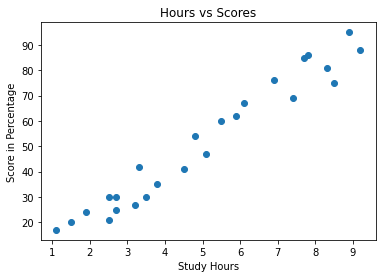

In [15]:
# plot of distribution of score

plt.scatter(df.Hours,df.Scores)
plt.xlabel('Study Hours')
plt.ylabel('Score in Percentage')
plt.title('Hours vs Scores')

**From the graph, we can say that there is a positive linear relation between the number of hours studied and the score of students in percentage**

In [16]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Plotting the strength/correlation of the data points.**

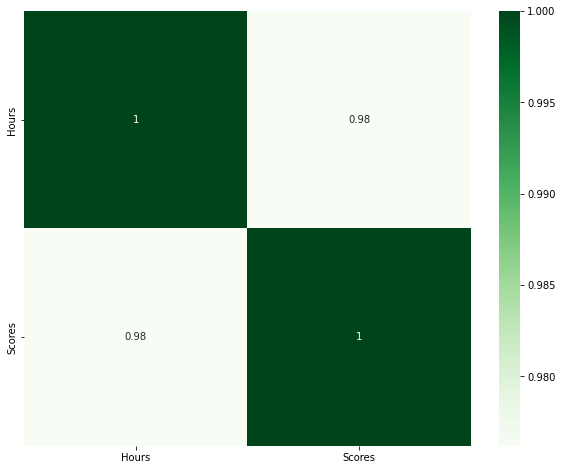

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='Greens',)

**Checking for outliers via boxplot.**

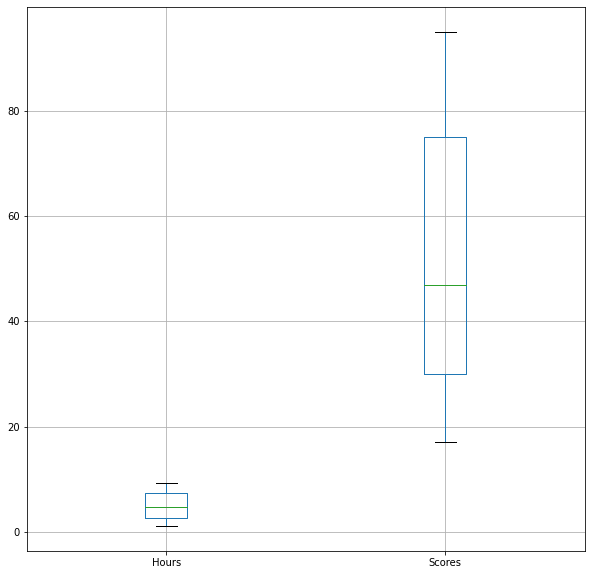

In [18]:
plt.figure(figsize=(10,10))
df.boxplot()

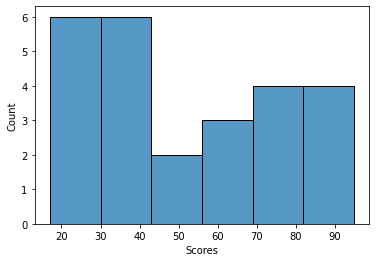

In [19]:
sns.histplot(df.Scores)

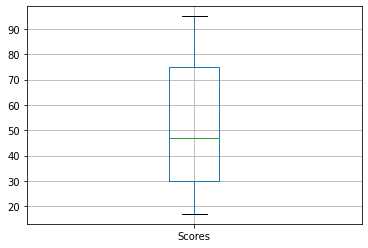

In [20]:
df[['Scores']].boxplot()

# Preparing the data/ Splitting the data:

Divide the data into "attributes" (inputs/independent variable) and "labels" (outputs/ dependent variable)

In [21]:
X=df.Hours.values.reshape(-1,1)

In [22]:
y=df.Scores

**We now have our attributes and labels, the enxt step is to split the data into training and testing sets using Scikits Learn's built-in** *train_test_split()* **method.**

In [23]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)

In [24]:
len(X_train)

20

In [25]:
len(X_test)

5

In [26]:
len(y_train)

20

In [27]:
len(y_test)

5

#Training the Algorithm:

Since the dataset invovles just two variables, it is a **Simple Linear Regression** model.

In [28]:
model= LinearRegression()

In [29]:
model.fit(X_train,y_train)

LinearRegression()

In [30]:
model.intercept_

2.018160041434662

In [31]:
model.coef_

array([9.91065648])

**To plot the regression line/ line of best fit:**

In [32]:
line= model.intercept_+ X*model.coef_

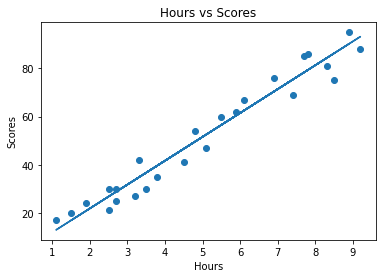

In [33]:
plt.scatter(X,y)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.plot(X,line)
plt.show()

# Making Predictions:
Now that we are done training the model, it's time to make some predictions based on the training.

In [34]:
y_test

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

In [35]:
pred_y=model.predict(X_test) #for predicting the score(dependent variable) via hours(independent variable)

In [36]:
#Comparing the Actual vs Predicted values:
newdf=pd.DataFrame({"Actual values": y_test,"Predicted values": pred_y})

In [37]:
newdf

,Actual values,Predicted values
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


Checking for some relationship between the Actual and the Predicted data via Scatter plot

Text(0.5, 1.0, 'Actual values vs Predicted values')

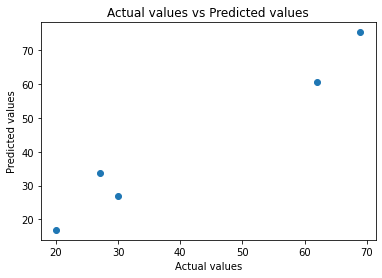

In [38]:
plt.scatter(newdf["Actual values"],newdf["Predicted values"])
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual values vs Predicted values")

In [39]:
newdf.corr()

,Actual values,Predicted values
Actual values,1.000000,0.980684
Predicted values,0.980684,1.000000


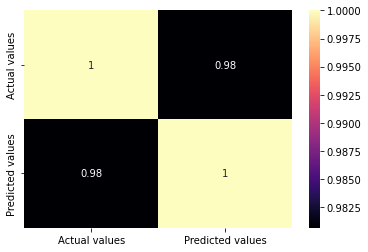

In [40]:
sns.heatmap(newdf.corr(),annot=True,cmap='magma')

#**Evaluating the Model:**
We now evaluate the performance of algorithm using metrics. Here we are evaluating the model's performance through R^2. 

In [41]:
r2_score(y_test,pred_y)

0.9454906892105354

From the above evaluation it seems our model is predicts pretty accurately with an accuracy of 94.5 %

#Part-2 of Problem Statement:
**To find the predicted score if a student studies for 9.5 hours**

* Since we have trained and tested the model we can now provide it with unknown data for testing and prediction purposes.

In [55]:
ans=model.predict([[9.5]]) #here,hours=9.5

In [57]:
print("No. of hours = {}".format(9.5))
print("Predicted score = {}".format(ans))

No. of hours = 9.5
Predicted score = [96.16939661]


**Hence, a student studying for 9.5 hrs would score a percentage of 93.7%**


##Conclusion:
We have successfully carried out the score prediction using Supervised ML task and was able to evaluate the model's performance using metrics of our choice.

#**Thank You**